In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import pickle

In [2]:
df = pd.read_csv ("/content/train.csv")
df_test =  pd.read_csv ("/content/test.csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_test.shape

(4277, 13)

In [6]:
df = df.drop('Name',axis=1)
df_test = df_test.drop('Name',axis=1)

In [7]:
df = df.drop('PassengerId',axis=1)

In [8]:
pid_test = df_test.PassengerId
df_test = df_test.drop('PassengerId',axis=1)


In [9]:
df.head(1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False


In [10]:
df_test.head(1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0


**EDA (Exploratory Data Ananlysis)**

---



In [11]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [13]:
df_test.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), object(5)
memory usage: 367.7+ KB


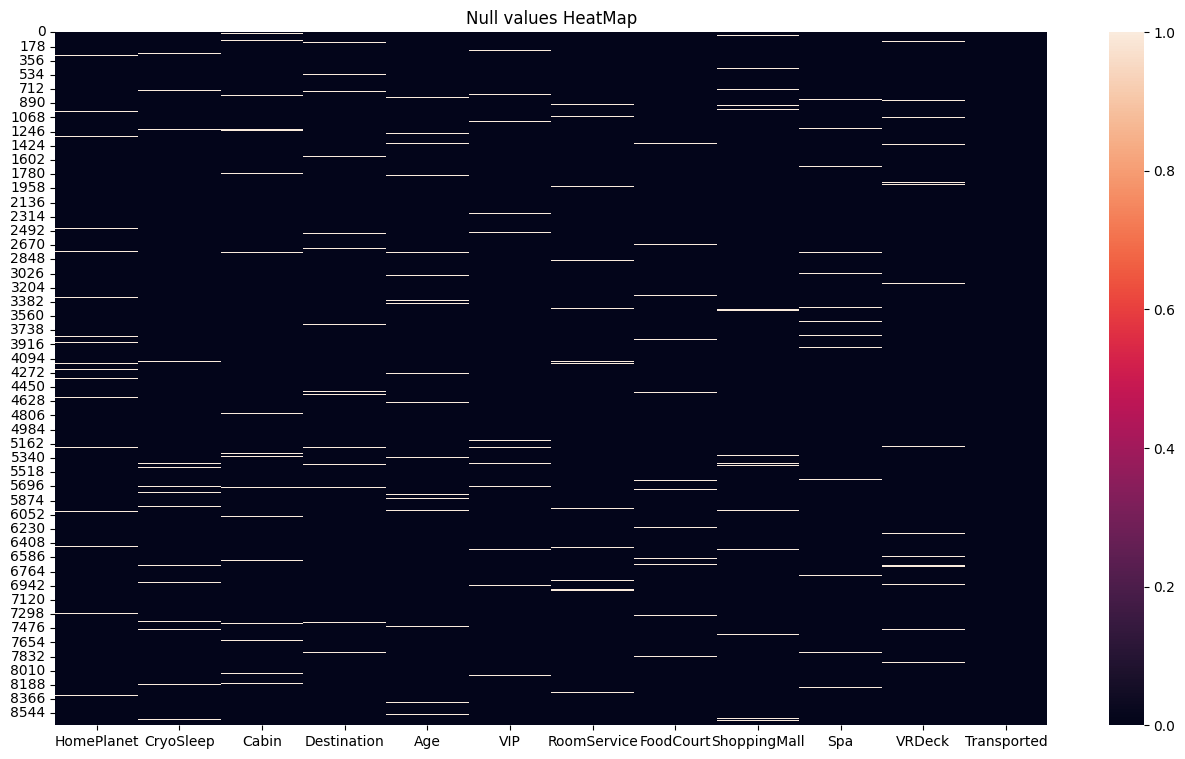

In [15]:
plt.figure(figsize=(16,9));
sns.heatmap(df.isnull());
plt.title("Null values HeatMap");

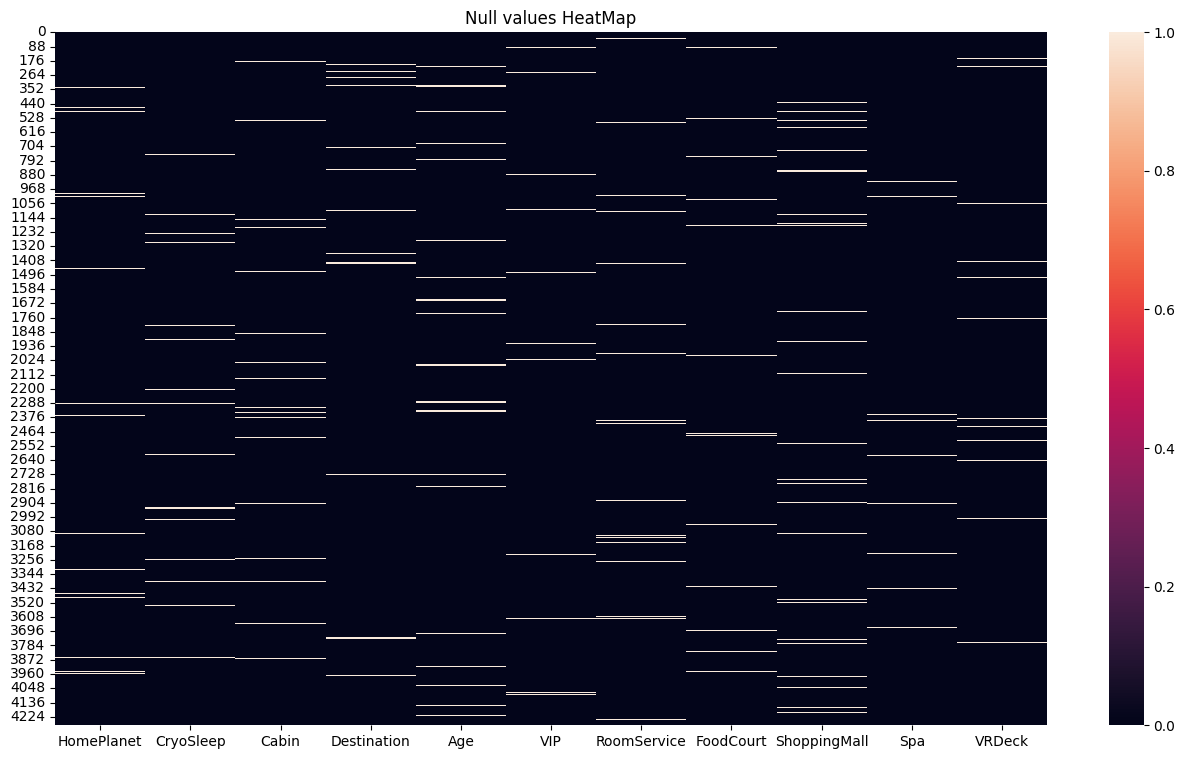

In [16]:
plt.figure(figsize=(16,9));
sns.heatmap(df_test.isnull());
plt.title("Null values HeatMap");

Univariate Analysis

---



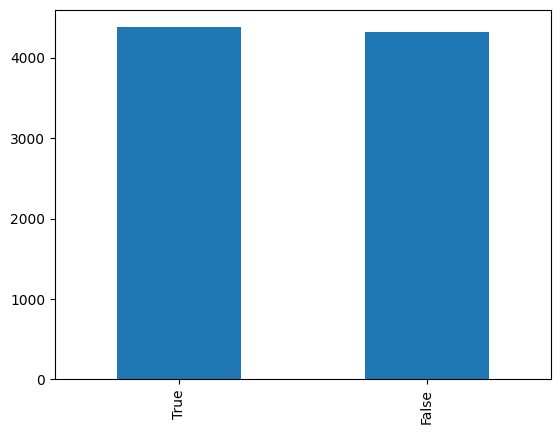

In [17]:
df['Transported'].value_counts().plot(kind='bar');

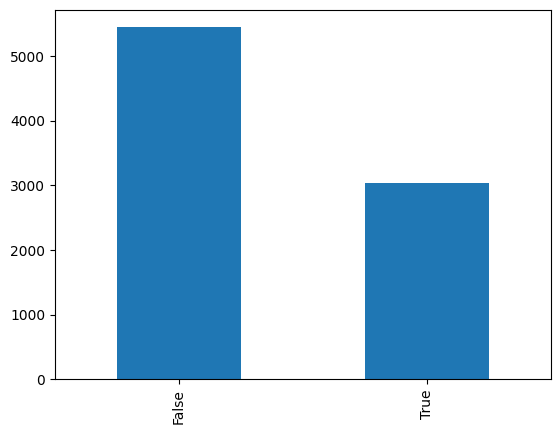

In [18]:
df['CryoSleep'].value_counts().plot(kind='bar');

More no of people (more then 5000) are not placed in cryosleep

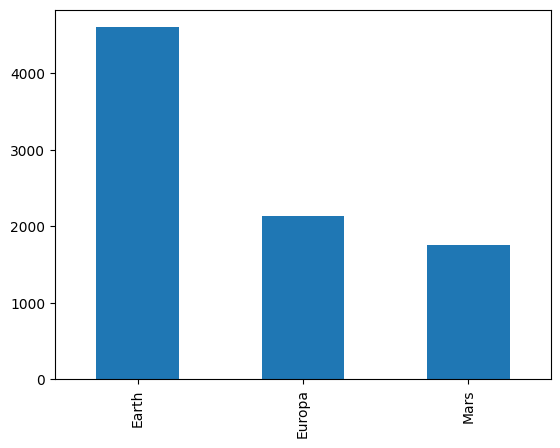

In [19]:
df['HomePlanet'].value_counts().plot(kind='bar');

Maximum number of people (more then 4000) belonged from Earth planet

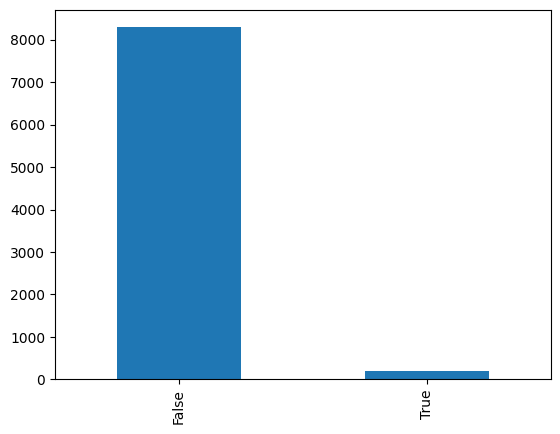

In [20]:
df['VIP'].value_counts().plot(kind='bar');

Most of the people are not VIP's

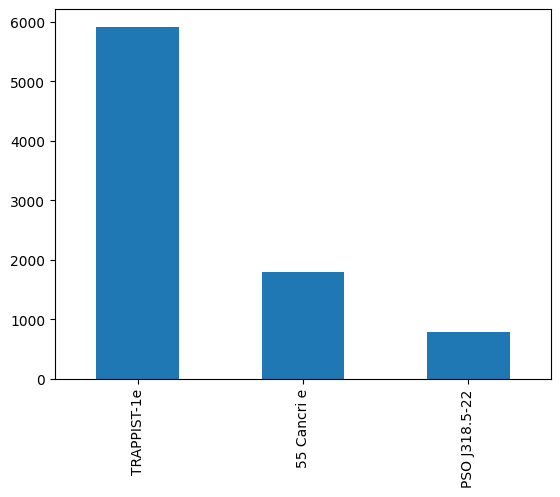

In [21]:
df['Destination'].value_counts().plot(kind='bar');

The destination for the most of the people is planet TRAPPIST-1e

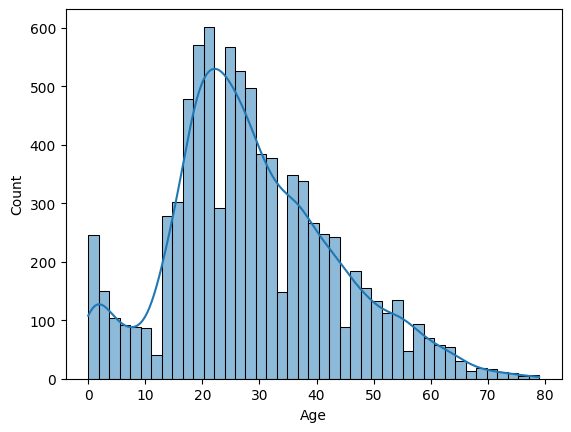

In [22]:
sns.histplot(df['Age'],kde=True);

<Axes: >

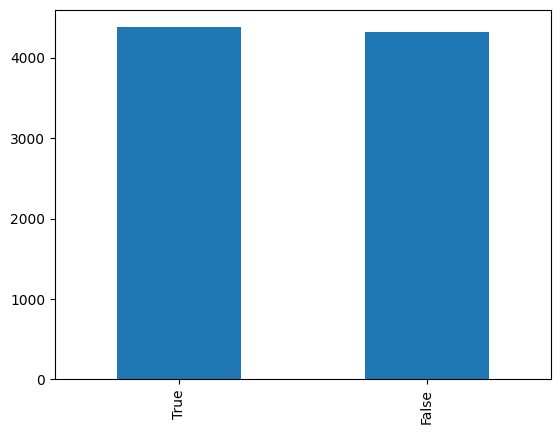

In [23]:
df['Transported'].value_counts().plot(kind='bar')

Bivariate Analysis

---



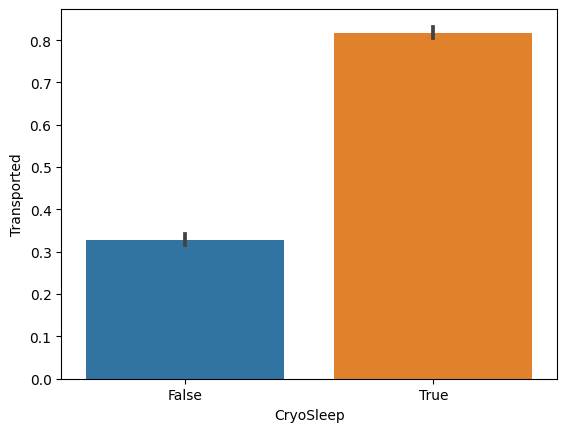

In [24]:
sns.barplot(x=df['CryoSleep'],y=df['Transported']);

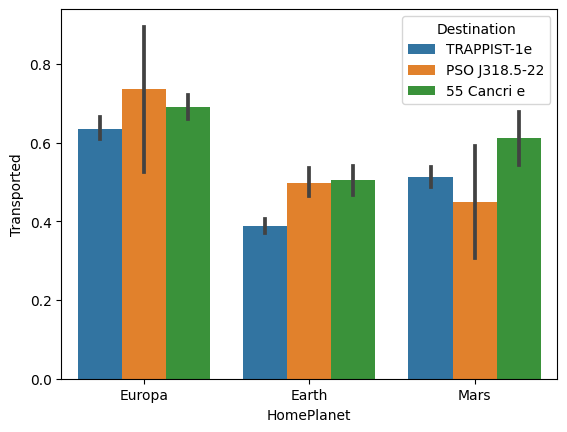

In [25]:
sns.barplot(x=df['HomePlanet'],y=df['Transported'],hue=df['Destination']);

Maximum people who puts in cryosleep transported

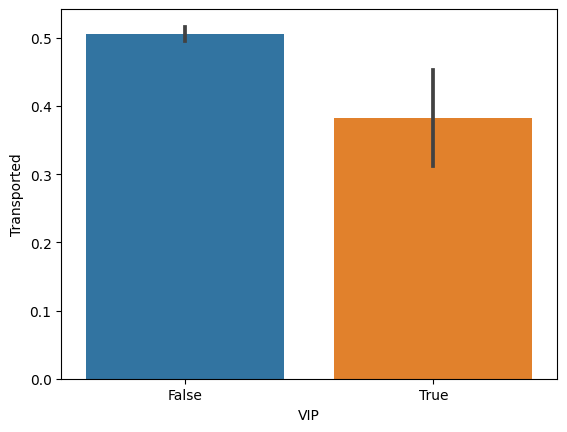

In [26]:
sns.barplot(x=df['VIP'],y=df['Transported']);

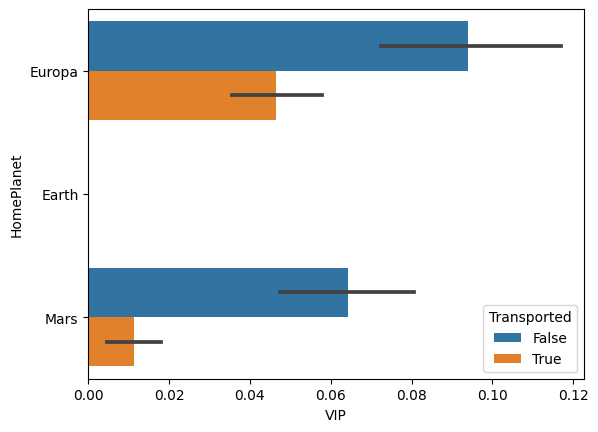

In [27]:
sns.barplot(x=df['VIP'],y=df['HomePlanet'],hue=df['Transported']);

Multivariate Analysis

---



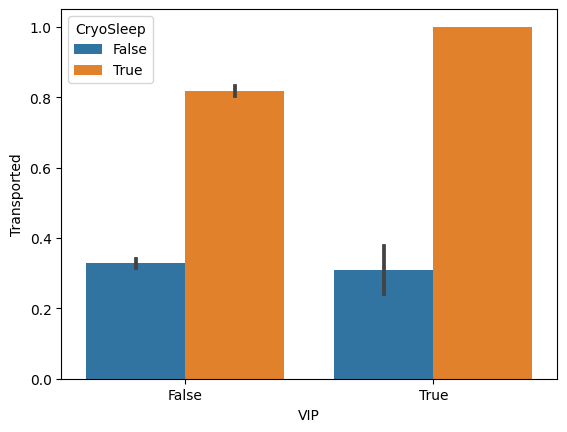

In [28]:
sns.barplot(x=df['VIP'],y=df['Transported'],hue=df['CryoSleep']);

Maximum people who are VIP's and Puts into Cryosleep is Transported.

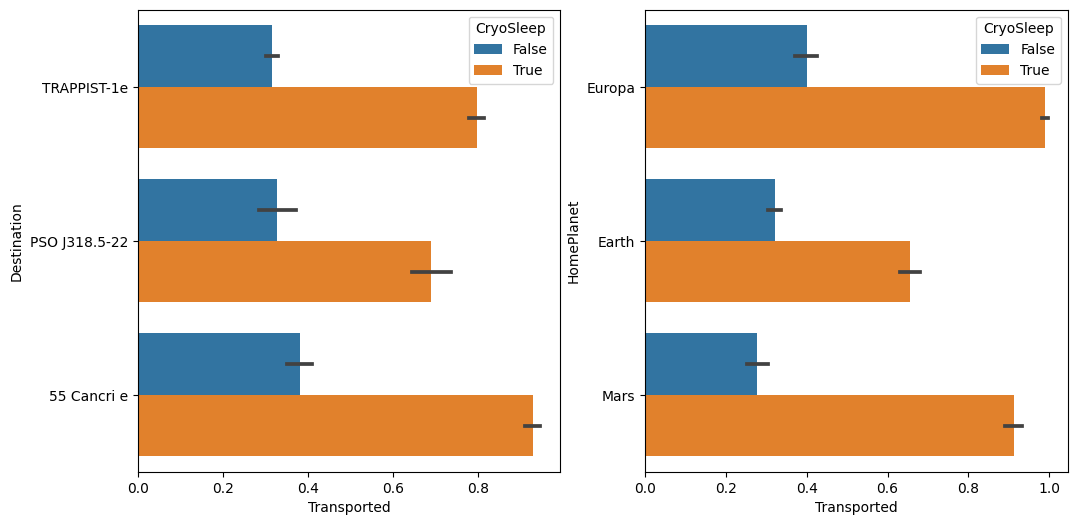

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=df['Transported'],y=df['Destination'],hue=df['CryoSleep']);
plt.subplot(1,2,2)
sns.barplot(x=df['Transported'],y=df['HomePlanet'],hue=df['CryoSleep']);


In [30]:
df.groupby('HomePlanet')['Age'].median()

HomePlanet
Earth     23.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64

In [31]:
df.groupby(['HomePlanet','Transported'])['Age'].median()

HomePlanet  Transported
Earth       False          24.0
            True           22.0
Europa      False          35.0
            True           31.0
Mars        False          30.0
            True           26.0
Name: Age, dtype: float64

Pearson Corelation

---



In [32]:
df.corr()['Transported']

<ipython-input-32-c2929b33b277>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Transported']


Age            -0.075026
RoomService    -0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa            -0.221131
VRDeck         -0.207075
Transported     1.000000
Name: Transported, dtype: float64

<ipython-input-33-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

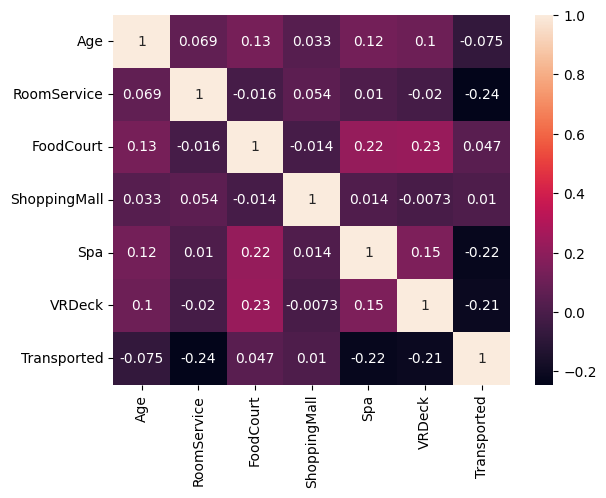

In [33]:
sns.heatmap(df.corr(),annot=True)

**Data Preprocessing**

In [34]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [35]:
df_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

Imputation

---



In [36]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [37]:
df['HomePlanet'].fillna('Earth',inplace = True)
df_test['HomePlanet'].fillna('Earth',inplace = True)

In [38]:
df['Age'].fillna(df.groupby(['HomePlanet','Transported'])['Age'].transform('median'),inplace=True)
df_test['Age'].fillna(df_test.groupby(['HomePlanet'])['Age'].transform('median'),inplace=True)

In [39]:
df.groupby(['Transported'])['CryoSleep'].agg(pd.Series.mode)

Transported
False    False
True      True
Name: CryoSleep, dtype: bool

In [40]:
z= df[df['CryoSleep'].isnull()].index.tolist()

In [41]:
for i in z:
    if df.iloc[i]['Transported'] == True:
        df.at[i,'CryoSleep'] = True

    else:
        df.at[i,'CryoSleep'] = False
        

In [42]:
x_cab =  df['Cabin'].str.split('/',n=2,expand=True)
x_cab_test =  df_test['Cabin'].str.split('/',n=2,expand=True)
x_cab = x_cab[2]
x_cab_test = x_cab_test[2]
df['Cabin'] = x_cab
df_test['Cabin'] = x_cab_test


<Axes: xlabel='Destination', ylabel='Transported'>

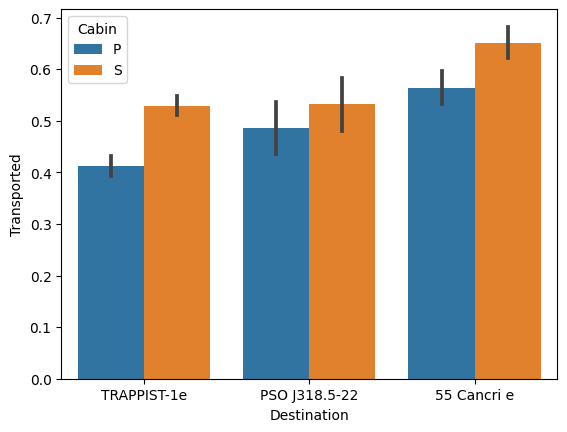

In [43]:
sns.barplot(x=df['Destination'],y=df['Transported'],hue=df['Cabin'])

<Axes: xlabel='HomePlanet', ylabel='Transported'>

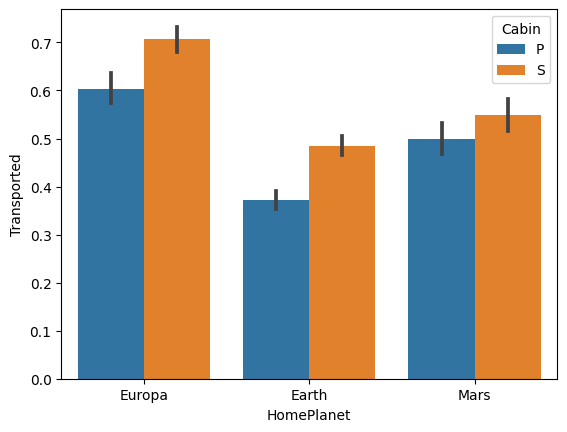

In [44]:
sns.barplot(x=df['HomePlanet'],y=df['Transported'],hue=df['Cabin'])

In [45]:
df.groupby(['Destination','Transported'])['Cabin'].agg(pd.Series.mode)

Destination    Transported
55 Cancri e    False          P
               True           S
PSO J318.5-22  False          P
               True           S
TRAPPIST-1e    False          P
               True           S
Name: Cabin, dtype: object

In [46]:
z= df[df['Cabin'].isnull()].index.tolist()
for i in z:
    if df.iloc[i]['Transported'] == True:
        df.at[i,'Cabin'] = 'S'

    else:
        df.at[i,'Cabin'] = 'P'

In [47]:
df.groupby(['HomePlanet'])['Destination'].agg(pd.Series.mode)

HomePlanet
Earth     TRAPPIST-1e
Europa    TRAPPIST-1e
Mars      TRAPPIST-1e
Name: Destination, dtype: object

In [48]:
df['Destination'].fillna('TRAPPIST-1e',inplace = True)
df_test['Destination'].fillna('TRAPPIST-1e',inplace = True)

In [49]:
df.groupby(['HomePlanet','Transported'])['VIP'].agg(pd.Series.mode)

HomePlanet  Transported
Earth       False          False
            True           False
Europa      False          False
            True           False
Mars        False          False
            True           False
Name: VIP, dtype: bool

In [50]:
df['VIP'].fillna(False,inplace = True)
df_test['VIP'].fillna(False,inplace = True)

In [51]:
df_test['Cabin'].fillna('S',inplace = True)

In [52]:
df_test['CryoSleep'].fillna(False,inplace = True)

In [53]:
df['RoomService'].fillna(df.groupby('VIP')['RoomService'].transform('mean'),inplace=True)
df['FoodCourt'].fillna(df.groupby('VIP')['FoodCourt'].transform('mean'),inplace=True)
df['ShoppingMall'].fillna(df.groupby('VIP')['ShoppingMall'].transform('mean'),inplace=True)
df['Spa'].fillna(df.groupby('VIP')['Spa'].transform('mean'),inplace=True)
df['VRDeck'].fillna(df.groupby('VIP')['VRDeck'].transform('mean'),inplace=True)

In [54]:
df_test['RoomService'].fillna(df_test.groupby('VIP')['RoomService'].transform('mean'),inplace=True)
df_test['FoodCourt'].fillna(df_test.groupby('VIP')['FoodCourt'].transform('mean'),inplace=True)
df_test['ShoppingMall'].fillna(df_test.groupby('VIP')['ShoppingMall'].transform('mean'),inplace=True)
df_test['Spa'].fillna(df_test.groupby('VIP')['Spa'].transform('mean'),inplace=True)
df_test['VRDeck'].fillna(df_test.groupby('VIP')['VRDeck'].transform('mean'),inplace=True)

In [55]:
df['Room_cost'] = df['RoomService'] + df['Spa'] + df['VRDeck']
df['luxury_cost'] = df['FoodCourt'] + df['ShoppingMall'] 
df_test['Room_cost'] = df_test['RoomService'] + df_test['Spa'] + df_test['VRDeck']
df_test['luxury_cost'] = df_test['FoodCourt'] + df_test['ShoppingMall'] 

In [56]:
print(df.isnull().sum()) 

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Room_cost       0
luxury_cost     0
dtype: int64


In [57]:
print(df_test.isnull().sum())

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Room_cost       0
luxury_cost     0
dtype: int64


<Axes: xlabel='Transported', ylabel='ShoppingMall'>

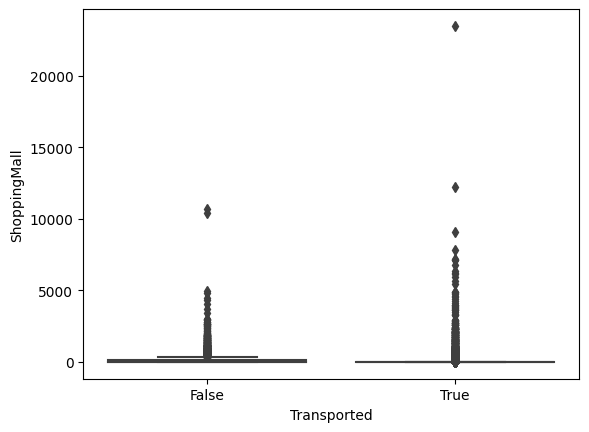

In [58]:
sns.boxplot(x = 'Transported', y = 'ShoppingMall' , data = df)

In [59]:
df[df['ShoppingMall']>20000].index.tolist()

[8415]

In [60]:
df.drop(df.index[8415],inplace=True)

<Axes: xlabel='Transported', ylabel='FoodCourt'>

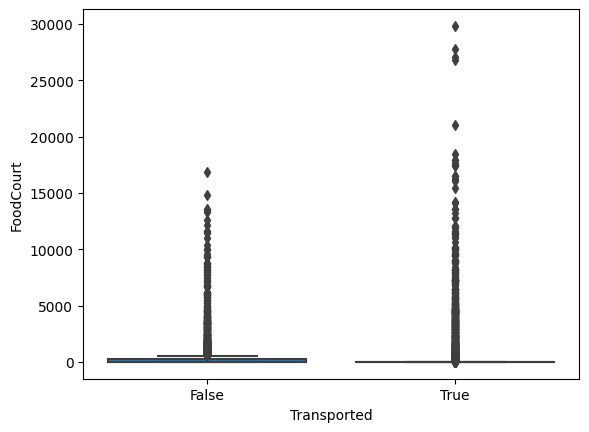

In [61]:
sns.boxplot(x = 'Transported', y = 'FoodCourt' , data = df)

In [62]:
df[df['FoodCourt']>25000].index.tolist()

[1213, 2067, 3198, 3538]

In [63]:
df = df.drop(columns=['FoodCourt','ShoppingMall','VRDeck','RoomService','Spa'],axis=1)

In [64]:
x = df.drop('Transported',axis=1)

In [65]:
y = df['Transported']

**Train Test Split**

---



In [66]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [67]:
print(x_train.shape)  
print(x_test.shape)

(6953, 8)
(1739, 8)


In [68]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'Transported', 'Room_cost', 'luxury_cost'],
      dtype='object')

In [69]:
transformer = ColumnTransformer(
                transformers =[
                    ('tnf1', OneHotEncoder(sparse_output = False , drop = 'first'),['HomePlanet','CryoSleep','Cabin','Destination','VIP'])
                ],
                remainder= 'passthrough')

In [70]:
x_train_new = transformer.fit_transform(x_train)

In [71]:
x_test_new = transformer.transform(x_test)

In [72]:
le = LabelEncoder()
y_train_new = le.fit_transform(y_train)
y_test_new = le.transform(y_test)

**Model 1**

In [73]:
lr = LogisticRegression(max_iter=300)
lr.fit(x_train_new,y_train_new)

LogisticRegression(max_iter=300)

In [74]:
lr_pred = lr.predict(x_test_new)

In [75]:
confusion_matrix(y_test_new,lr_pred)

array([[673, 171],
       [161, 734]])

In [76]:
accuracy_score(y_test_new,lr_pred)

0.8090856814261069

**Model2**

In [78]:
gb = GaussianNB()

In [79]:
gb.fit(x_train_new,y_train_new)

GaussianNB()

In [80]:
gb_pred = gb.predict(x_test_new)

In [81]:
confusion_matrix(y_test_new,gb_pred)

array([[640, 204],
       [143, 752]])

In [86]:
accuracy_score(y_test_new,gb_pred).round(5)

0.80046

**Model3**

In [90]:
sv = svm.SVC(kernel='rbf')

In [91]:
sv.fit(x_train_new,y_train_new)

SVC()

In [92]:
sv_pred = sv.predict(x_test_new)

In [93]:
confusion_matrix(y_test_new,sv_pred)

array([[618, 226],
       [130, 765]])

In [94]:
accuracy_score(y_test_new,sv_pred).round(5)

0.79528